We Would first Liek to know about the Quality Comparision in regards to Average property price. This let's us understand the general census of the Dubai Housing Market

In [1]:
import pandas as pd 
import numpy as np

In [4]:
df = pd.read_csv("properties_data.csv")

In [5]:
df.head

<bound method NDFrame.head of            id                       neighborhood   latitude  longitude  \
0     5528049                      Palm Jumeirah  25.113208  55.138932   
1     6008529                      Palm Jumeirah  25.106809  55.151201   
2     6034542               Jumeirah Lake Towers  25.063302  55.137728   
3     6326063                    Culture Village  25.227295  55.341761   
4     6356778                      Palm Jumeirah  25.114275  55.139764   
...       ...                                ...        ...        ...   
1900  7705450           Mohammed Bin Rashid City  25.176892  55.310712   
1901  7706287           Mohammed Bin Rashid City  25.166145  55.276684   
1902  7706389  Dubai Creek Harbour (The Lagoons)  25.206500  55.345056   
1903  7706591            Jumeirah Village Circle  25.073858  55.229844   
1904  7706643               Jumeirah Lake Towers  25.079130  55.154713   

        price  size_in_sqft  price_per_sqft  no_of_bedrooms  no_of_bathrooms  \
0

In [23]:
average_price = df['price'].mean()
average_price_by_quality = df.groupby('quality')['price'].mean().reset_index()
average_price_by_quality.columns = ["quality", "Average Price"]



/var/folders/mp/b654fgx16yd102pxznzm0mm00000gn/T/ipykernel_55173/41102865.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_quality = df.groupby('quality')['price'].mean().reset_index()


In [35]:
quality_order = ['Low', 'Medium', 'High',]
df['quality'] = pd.Categorical(df['quality'], categories=quality_order, ordered=True)
average_price_by_quality = average_price_by_quality.sort_values('quality')

In [36]:
print(f"The average property price is: {average_price}")

The average property price is: 2085829.8734908137


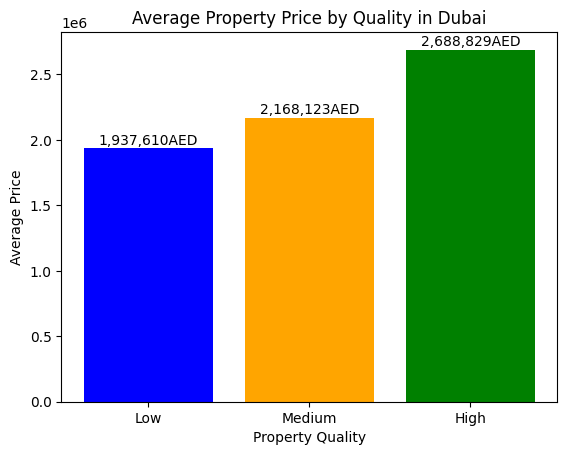

In [37]:
import matplotlib.pyplot as plt

quality_order = average_price_by_quality['quality'].tolist()
average_prices = average_price_by_quality['Average Price'].tolist()


plt.Figure(figsize=(10,6))
bars = plt.bar(quality_order, average_prices, color=['blue', 'orange', 'green'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5000, f'{yval:,.0f}AED', ha='center', va='bottom')


plt.xlabel('Property Quality')
plt.ylabel('Average Price')
plt.title('Average Property Price by Quality in Dubai')
plt.show()  



Now Let us use the same dataset to understand what affects prices of properties in the market. For this we can first check if a pool always realtes to a higher price 

In [41]:
average_price_by_pool = df.groupby('private_pool')['price'].mean().reset_index()

average_price_by_pool['private_pool'] = average_price_by_pool['private_pool'].replace({True: 'Has Private Pool', False: 'No Private Pool'})
average_price_by_pool.columns = ['Private Pool Status', 'Average Price']

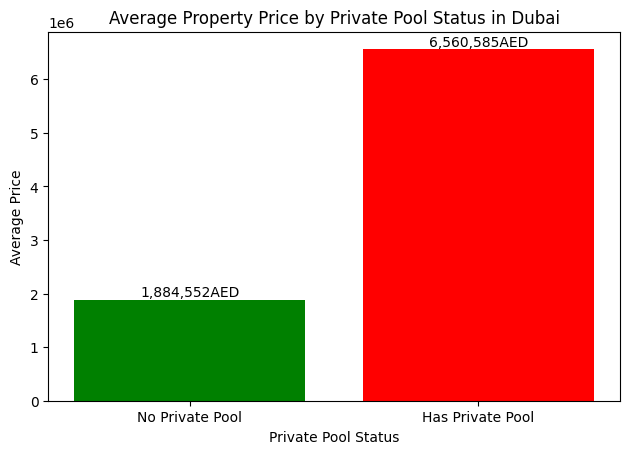

In [42]:
pool_status = average_price_by_pool['Private Pool Status'].tolist()
average_prices_pool = average_price_by_pool['Average Price'].tolist()

plt.Figure(figsize=(8,5))
bars = plt.bar(pool_status, average_prices_pool, color=['green', 'red'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5000, f'{yval:,.0f}AED', ha='center', va='bottom')

plt.xlabel('Private Pool Status')
plt.ylabel('Average Price')
plt.title('Average Property Price by Private Pool Status in Dubai')
plt.savefig('average_price_by_pool.png')
plt.tight_layout()
plt.show()

Now Let us Look at the top 10 neighbourhoods in Dubai and to see the price distribution across neighborhoods. To achieve this we will be using a box plot to visualise the data.

In [49]:
top_10_neighborhoods = df['neighborhood'].value_counts().nlargest(10).index.tolist()
df_top_10 = df[df['neighborhood'].isin(top_10_neighborhoods)].copy()

median_prices_df = df_top_10.groupby('neighborhood')['price'].median().sort_values(ascending=False).reset_index()
median_prices_df.columns = ['Neighborhood', 'Median Price']

plot_data = df_top_10[['neighborhood', 'price']].copy()

print("Top 10 Neighborhoods sorted by Median Price (descending):")
print(median_prices_df.to_string(index=False))

Top 10 Neighborhoods sorted by Median Price (descending):
            Neighborhood  Median Price
           Palm Jumeirah     2275000.0
Jumeirah Beach Residence     2125000.0
          Downtown Dubai     2100000.0
                Jumeirah     1795000.0
            Dubai Marina     1574975.0
               The Views     1399000.0
      Dubai Hills Estate     1300000.0
            Business Bay     1299999.0
    Jumeirah Lake Towers      845000.0
 Jumeirah Village Circle      677500.0



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/var/folders/mp/b654fgx16yd102pxznzm0mm00000gn/T/ipykernel_55173/2826725568.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neighborhood', y='price', data=plot_data, order=median_prices,palette='Set3',showfliers=False)


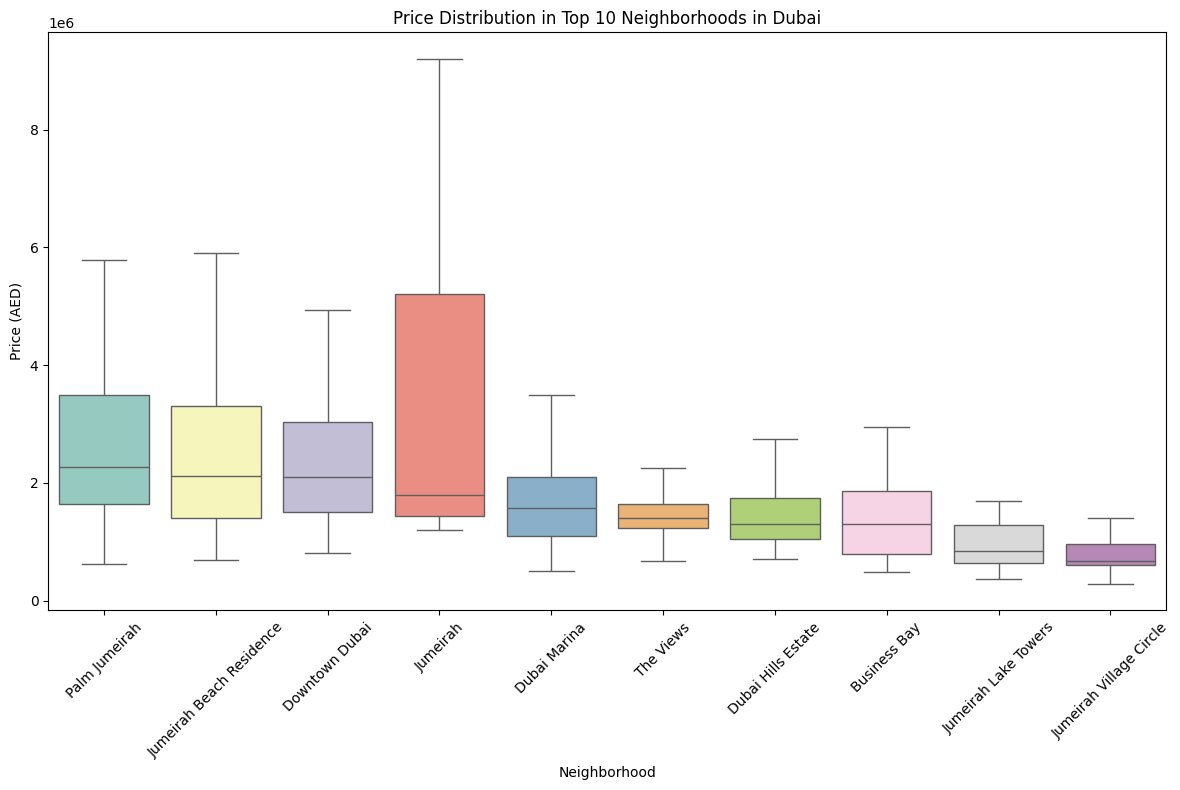

In [56]:
%pip install seaborn
import seaborn as sns

plt.figure(figsize=(12,8))
sns.boxplot(x='neighborhood', y='price', data=plot_data, order=median_prices,palette='Set3',showfliers=False)

plt.title('Price Distribution in Top 10 Neighborhoods in Dubai')
plt.xlabel('Neighborhood')
plt.ylabel('Price (AED)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('price_distribution_top_10_neighborhoods.png')
plt.show()

Key Insights from the Box Plot:

Price Leader: Palm Jumeirah stands out as the clear leader. Its median price is the highest, and its entire distribution box is shifted significantly upward compared to every other area.

Highest Spread: Dubai Marina shows a wide price range (tall box), indicating high price variability within this neighborhood, likely due to a mix of small/older apartments and high-end units.

Consistent Value: Neighborhoods like Jumeirah Village Circle and Jumeirah Lake Towers have very tight, low-lying boxes, meaning they offer the most consistent and lowest price points among the top 10, confirming their status as affordable areas.

Luxury Clusters: The top four neighborhoods (Palm Jumeirah, JBR, Downtown Dubai, Jumeirah) form a cluster of luxury areas, with median prices all substantially higher than the rest of the group.

In [59]:
numerical_col = ['price','size_in_sqft','no_of_bedrooms','no_of_bathrooms','price_per_sqft']
correlation_matrix = df[numerical_col].copy()

correlation_matrix_display = correlation_matrix.corr()

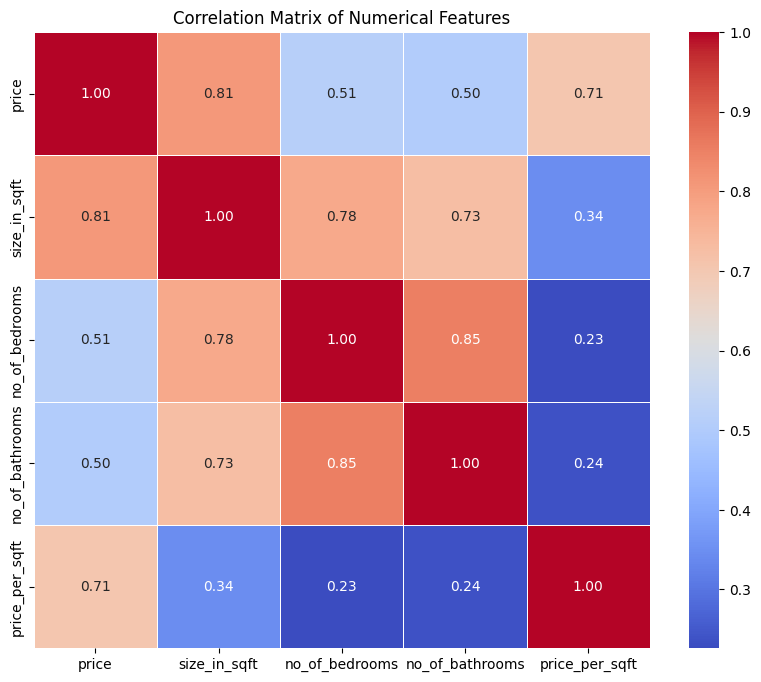

In [61]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix_display, annot=True, fmt=".2f", cmap='coolwarm', square=True,linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('correlation_matrix.png')
plt.show()


Now Let us do some machine learning and predictive analysis to buld a model that can estimate a property price based on certain key factors.

We will be using Multiple Linear Regression to predict the price based on multiple input features and its easy to interpret

In [68]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split

features = [
    'size_in_sqft',
    'no_of_bedrooms',
    'no_of_bathrooms',
    'price_per_sqft',
    'latitude',
    'longitude',
]

target = 'price'

X = df[features]
Y = df[target]

data = pd.concat([X,Y],axis= 1).dropna()
X = data[features]
Y = data[target]

X_train , X_test , Y_train , Y_test = train_test_split(
    X,
    Y,
    test_size= 0.2,
    random_state=30
)

print(f"Total Samples: {len(df)}")
print(f"Samples Used for training : {len(X_train)}")
print(f"Samples Used for testing: {len(X_test)}")





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 33.9 MB/s  0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 43.1 MB/s  0:00:00 46.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn]0m 3/4 [scikit-learn]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Total Samples: 1905
Samples Used for training : 1524
Samples Used for testing: 381


In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import numpy as np 


model = LinearRegression()
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)

r2 = r2_score(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mean_squared_error(Y_test,y_pred))


coeff = pd.Series(model.coef_,index = features)

print("\n --- Model Performance Metrics ---")
print(f"R-Squared :{r2:.4f}")
print(f"mean_absolute_error:{mae:,.0f}")
print(f"Root mean Squred Error: {rmse:,.0f} AED")

print("Coefficient indicates the change in Price for a one-unit increase in the feature.")
print(coeff)



 --- Model Performance Metrics ---
R-Squared :0.8832
mean_absolute_error:527,505
Root mean Squred Error: 804,635 AED
Coefficient indicates the change in Price for a one-unit increase in the feature.
size_in_sqft       2.810292e+03
no_of_bedrooms    -6.258035e+05
no_of_bathrooms   -1.065269e+05
price_per_sqft     2.387750e+03
latitude          -8.361896e+06
longitude          5.443588e+06
dtype: float64
